<a href="https://colab.research.google.com/github/jahnavi-2116/AI-ML-projects/blob/main/EDA_%26_Clustering_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install necessary libraries
# pip install pandas numpy scikit-learn gradio
! pip install gradio
! pip install pandas
! pip install numpy
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

In [5]:
import warnings
warnings.filterwarnings ('ignore')

In [6]:
customers = pd.read_csv('/content/k_hc.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Checking for duplicates
customers.duplicated().sum()

np.int64(0)

In [9]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Annual Income vs. Spending Score')

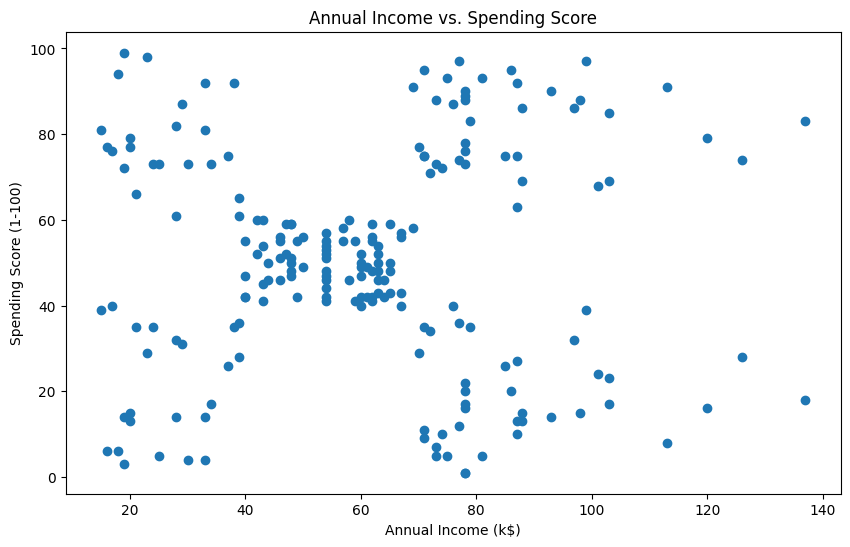

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(customers['Annual Income (k$)'], customers['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')

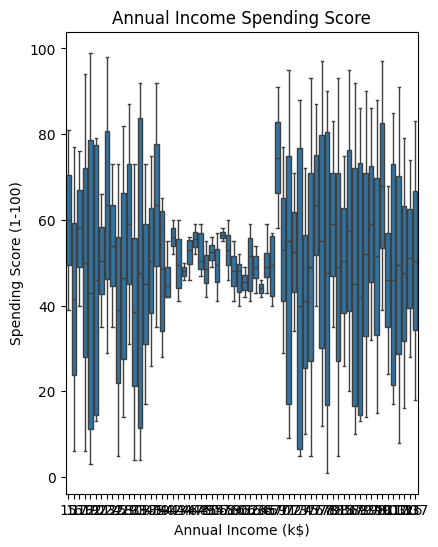

In [11]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title('Annual Income Spending Score')
sns.boxplot(x=customers['Annual Income (k$)'], y=customers['Spending Score (1-100)'])

plt.show()

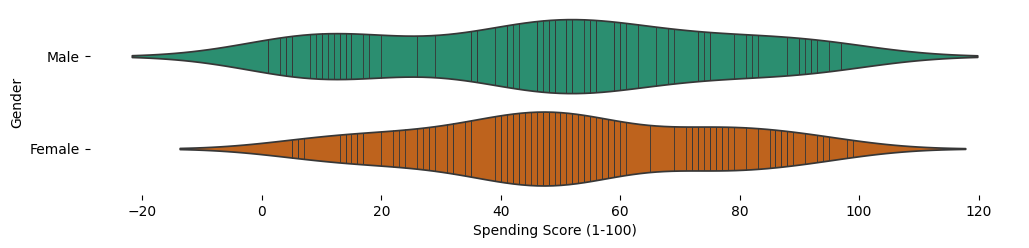

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(customers['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(customers, x='Spending Score (1-100)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

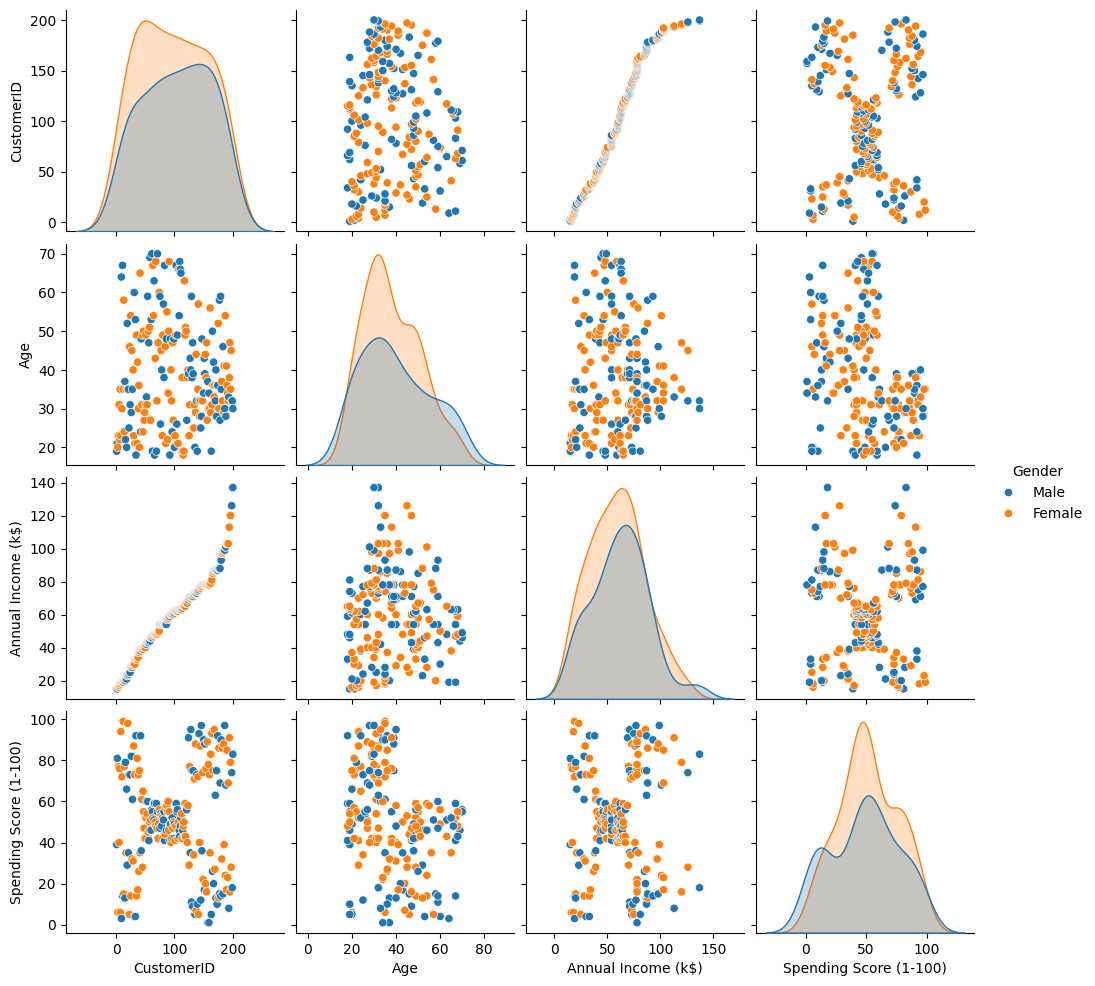

In [34]:
sns.pairplot(customers, hue='Gender')
plt.show()

In [43]:
#Defining the X component
X = customers[['Annual Income (k$)','Spending Score (1-100)']]

In [44]:
# scaling data using Sklearn importing StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Kmeans clustering
# Defining the method variable before using it
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
customers['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

In [49]:
# Trying Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5)
customers[hc] = hc.fit_predict(X_scaled)

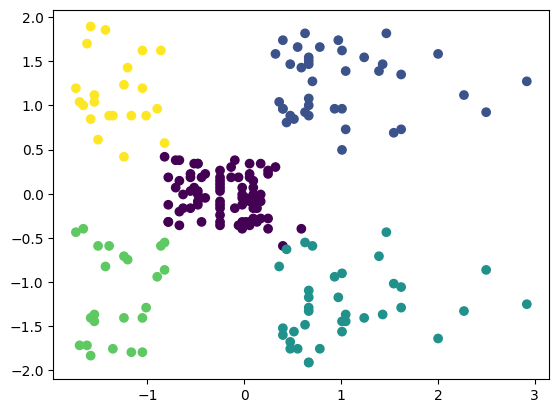

In [50]:
# Trying PCA visualization with color clusters
clusters = KMeans(n_clusters=5)
labels = clusters.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')

In [76]:
# Creating a Gradio web application to display the clusters based on the spending score and income given in the data
import gradio as gr

def predict_cluster_with_sliders(income, spending_score):
    input_data = scaler.transform([[income, score]])
    kmeans_label = kmeans.predict(input_data)[0]
    hc_label = hc.fit_predict(np.vstack([X_scaled, input_data]))[-1]
    return f"KMeans Cluster: {kmeans_label}", f"Hierarchical Cluster: {hc_label}"
interface = gr.Interface(
    fn=predict_cluster_with_sliders,
    inputs=[
        gr.Slider(minimum=0, maximum=200, default=50, label="Annual Income (k$)"),
        gr.Slider(minimum=0, maximum=100, default=50, label="Spending Score (1-100)")
    ],
    outputs=[
        gr.Textbox(label="KMeans Cluster"),
        gr.Textbox(label="Hierarchical Cluster")
    ],
    title="Customer Clustering Prediction",
    description="Enter your annual income and spending score to predict the cluster."
)
interface.launch()





TypeError: Slider.__init__() got an unexpected keyword argument 'default'

Note to yourself: Here in the above cell, while trying to create a gradio web application for Kmeans and Hierarchical Clustering, I'm getting an error that the gr.Slider component when i had setup the default value as 50. But it occured to me that the gradio library does not support any default parameter. So suggested change appeared to me was to change the component from default to value. This will help me change the initial value of the slider. So to fix that particular error, the default term is replaced with value in both the gr.Slider circumstances with the radio interface for efficient output.

In [79]:
# Creating a Gradio web application to display the clusters based on the spending score and income given in the data
import gradio as gr

def predict_cluster_with_sliders(income, spending_score):
    input_data = scaler.transform([[income,spending_score]])
    kmeans_label = kmeans.predict(input_data)[0]
    hc_label = hc.fit_predict(np.vstack([X_scaled, input_data]))[-1]
    return f"KMeans Cluster: {kmeans_label}", f"Hierarchical Cluster: {hc_label}"
interface = gr.Interface(
    fn=predict_cluster_with_sliders,
    inputs=[
        # Changing the 'default' to 'value' for setting up the initial slider position for better outputs
        gr.Slider(minimum=0, maximum=200, value=50, label="Annual Income (k$)"),
        # Changing the 'default' to 'value' for setting up the initial slider position for better outputs
        gr.Slider(minimum=0, maximum=100, value=50, label="Spending Score (1-100)")
    ],
    outputs=[
        gr.Textbox(label="KMeans Cluster"),
        gr.Textbox(label="Hierarchical Cluster")
    ],
    title="Customer Clustering Prediction",
    description="Enter your annual income and spending score to predict the cluster."
)
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://830df8c00973f8633c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
